Note to reader:

This script contains the original machine learning  and data processing code written by Vishal used to generate insights for the customers. A more abbreviated version of this document optimized for readability was created by Bethel

In [11]:
from dotenv import load_dotenv
import os
import requests
import alpaca_trade_api as tradeapi
import pandas as pd
import numpy as np
from finta import TA
from sklearn.metrics import mean_squared_error

In [12]:
load_dotenv('api.env')

True

In [13]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [14]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [15]:
alpaca = tradeapi.REST(
    alpaca_api_key,alpaca_secret_key,
    api_version="v2")

**For low risk tolerance**

In [16]:
symbol='SPY'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()

In [17]:
from finta import TA
historical_data = alpaca.get_bars(symbol, timeframe, start=start_date).df
historical_data['delta']=historical_data['close'].diff()
historical_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.44,209.24,209.30,30375,82,209.322606,NaN
2015-12-01 10:00:00+00:00,209.30,209.36,209.07,209.36,54490,118,209.214253,0.06
2015-12-01 11:00:00+00:00,209.37,209.65,209.37,209.44,44404,109,209.526441,0.08
2015-12-01 12:00:00+00:00,209.45,209.59,209.33,209.51,111106,234,209.460429,0.07
2015-12-01 13:00:00+00:00,209.52,209.67,209.27,209.32,426233,645,209.429479,-0.19
...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.60,400.10,401.34,21531817,153863,400.660677,0.73
2023-03-29 20:00:00+00:00,401.34,401.50,401.13,401.31,7916414,5051,400.948039,-0.03
2023-03-29 21:00:00+00:00,401.31,401.40,401.28,401.37,34718,375,401.352216,0.06


**For high risk tolerance**

In [18]:
symbol='EAST'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
east_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
east_data['delta']=east_data['close'].diff()
east_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.4500,3.5000,70776,196,3.673256,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.3501,3.4000,41341,175,3.480739,-0.1000
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.4100,3.5100,16624,104,3.495431,0.1100
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.4500,3.4900,19577,67,3.505403,-0.0200
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.4800,3.5000,15151,62,3.489088,0.0100
...,...,...,...,...,...,...,...,...
2023-03-29 16:00:00+00:00,0.259999,0.2600,0.2500,0.2500,3800,19,0.256230,0.0000
2023-03-29 17:00:00+00:00,0.254800,0.2550,0.2548,0.2548,5013,5,0.254954,0.0048
2023-03-29 18:00:00+00:00,0.254500,0.2545,0.2542,0.2545,479,4,0.254402,-0.0003


**For medium risk tolerance**

In [19]:
symbol='AAPL'
timeframe = '1H'
start_date = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
apple_data= alpaca.get_bars(symbol, timeframe, start=start_date).df
apple_data['delta']=apple_data['close'].diff()
apple_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100
...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198


In [20]:
apple_data

,open,high,low,close,volume,trade_count,vwap,delta
timestamp,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100
...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198


**VWAP Trading Signal**

We decide to buy/sell at points where the market price crosses the vwap.

In [21]:
historical_data['Predicted-vwap']=np.where(historical_data['vwap']>=historical_data['close'], 1,0)
historical_data['vwap-entry/exit']=historical_data['Predicted-vwap'].diff()
display(historical_data)


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit
timestamp,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.44,209.24,209.30,30375,82,209.322606,NaN,1,NaN
2015-12-01 10:00:00+00:00,209.30,209.36,209.07,209.36,54490,118,209.214253,0.06,0,-1.0
2015-12-01 11:00:00+00:00,209.37,209.65,209.37,209.44,44404,109,209.526441,0.08,1,1.0
2015-12-01 12:00:00+00:00,209.45,209.59,209.33,209.51,111106,234,209.460429,0.07,0,-1.0
2015-12-01 13:00:00+00:00,209.52,209.67,209.27,209.32,426233,645,209.429479,-0.19,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.60,400.10,401.34,21531817,153863,400.660677,0.73,0,0.0
2023-03-29 20:00:00+00:00,401.34,401.50,401.13,401.31,7916414,5051,400.948039,-0.03,0,0.0
2023-03-29 21:00:00+00:00,401.31,401.40,401.28,401.37,34718,375,401.352216,0.06,0,0.0


In [22]:
east_data['Predicted-vwap']=np.where(east_data['vwap']>=east_data['close'], 1,0)
east_data['vwap-entry/exit']=east_data['Predicted-vwap'].diff()
display(east_data)

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit
timestamp,,,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.4500,3.5000,70776,196,3.673256,NaN,1,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.3501,3.4000,41341,175,3.480739,-0.1000,1,0.0
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.4100,3.5100,16624,104,3.495431,0.1100,0,-1.0
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.4500,3.4900,19577,67,3.505403,-0.0200,1,1.0
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.4800,3.5000,15151,62,3.489088,0.0100,0,-1.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-29 16:00:00+00:00,0.259999,0.2600,0.2500,0.2500,3800,19,0.256230,0.0000,1,0.0
2023-03-29 17:00:00+00:00,0.254800,0.2550,0.2548,0.2548,5013,5,0.254954,0.0048,1,0.0
2023-03-29 18:00:00+00:00,0.254500,0.2545,0.2542,0.2545,479,4,0.254402,-0.0003,0,-1.0


In [23]:
apple_data['Predicted-vwap']=np.where(apple_data['vwap']>=apple_data['close'], 1,0)
apple_data['vwap-entry/exit']=apple_data['Predicted-vwap'].diff()
display(apple_data)

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit
timestamp,,,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN,1,NaN
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700,0,-1.0
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800,0,0.0
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400,0,0.0
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100,1,1.0
...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350,0,0.0
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500,1,1.0
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198,1,0.0


**RSI**

The stock is considered overbought when the RSI rises above 70 and considered oversold when the RSI dips below 30 

In [24]:
import numpy as np

def calculate_rsi(price_diff, n=14):
    rsi=[0]*len(price_diff)
    #first n days
    up_mean=price_diff.head(n)[price_diff>0].mean(skipna=True)
    down_mean=abs(price_diff.head(n)[price_diff<=0].mean(skipna=True))
    rs=float(up_mean/down_mean)
    rsi[:n]=[100-(100/(1+rs))]*n

    for i in range(n,len(price_diff)):
        up_mean=price_diff[i-n:i][price_diff>0].mean()
        down_mean=abs(price_diff[i-n:i][price_diff<=0]).mean(skipna=True)
        rs=float(up_mean/down_mean)
        rsi[i]=100-(100/(1+rs))
    return rsi



In [25]:
historical_data['rsi'] = calculate_rsi(historical_data.loc[:,['delta']])


In [26]:
east_data['rsi'] = calculate_rsi(east_data.loc[:,['delta']])


In [33]:
apple_data['rsi'] = calculate_rsi(apple_data.loc[:,['delta']])


In [27]:
sma10=TA.SMA(historical_data,period=10)
historical_data['sma-10']=sma10
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(10):
    sum+=close[i]
avg=sum/10
historical_data.loc[historical_data.index[:10], 'sma-10'] = avg

sma50=TA.SMA(historical_data,period=50)
historical_data['sma-50']=sma50
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
historical_data.loc[historical_data.index[:50], 'sma-50'] = avg

sma50=TA.SMA(historical_data,period=50)
historical_data['sma-50']=sma50
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
historical_data.loc[historical_data.index[:50], 'sma-50'] = avg

sma200=TA.SMA(historical_data,period=200)
historical_data['sma-200']=sma200
sma=[0]*len(historical_data['close'])
sum=0
close=historical_data['close']
for i in range(200):
    sum+=close[i]
avg=sum/200
historical_data.loc[historical_data.index[:200], 'sma-200'] = avg

historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200
timestamp,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.44,209.24,209.30,30375,82,209.322606,NaN,1,NaN,64.376590,209.65000,209.028698,206.709873
2015-12-01 10:00:00+00:00,209.30,209.36,209.07,209.36,54490,118,209.214253,0.06,0,-1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 11:00:00+00:00,209.37,209.65,209.37,209.44,44404,109,209.526441,0.08,1,1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 12:00:00+00:00,209.45,209.59,209.33,209.51,111106,234,209.460429,0.07,0,-1.0,64.376590,209.65000,209.028698,206.709873
2015-12-01 13:00:00+00:00,209.52,209.67,209.27,209.32,426233,645,209.429479,-0.19,1,1.0,64.376590,209.65000,209.028698,206.709873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.60,400.10,401.34,21531817,153863,400.660677,0.73,0,0.0,70.740939,399.67290,397.150086,393.581255
2023-03-29 20:00:00+00:00,401.34,401.50,401.13,401.31,7916414,5051,400.948039,-0.03,0,0.0,66.579327,399.89190,397.261886,393.649305
2023-03-29 21:00:00+00:00,401.31,401.40,401.28,401.37,34718,375,401.352216,0.06,0,0.0,71.594501,400.14890,397.359286,393.711856


In [34]:
sma10=TA.SMA(apple_data,period=10)
apple_data['sma-10']=sma10
sma=[0]*len(apple_data['close'])
sum=0
close=apple_data['close']
for i in range(10):
    sum+=close[i]
avg=sum/10
apple_data.loc[apple_data.index[:10], 'sma-10'] = avg

sma50=TA.SMA(apple_data,period=50)
apple_data['sma-50']=sma50
sma=[0]*len(apple_data['close'])
sum=0
close=apple_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
apple_data.loc[apple_data.index[:50], 'sma-50'] = avg

sma50=TA.SMA(apple_data,period=50)
apple_data['sma-50']=sma50
sma=[0]*len(apple_data['close'])
sum=0
close=apple_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
apple_data.loc[apple_data.index[:50], 'sma-50'] = avg

sma200=TA.SMA(apple_data,period=200)
apple_data['sma-200']=sma200
sma=[0]*len(apple_data['close'])
sum=0
close=apple_data['close']
for i in range(200):
    sum+=close[i]
avg=sum/200
apple_data.loc[apple_data.index[:200], 'sma-200'] = avg

apple_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,sma-10,sma-50,sma-200,rsi
timestamp,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN,1,NaN,118.40350,116.944982,115.351330,29.711802
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700,0,-1.0,118.40350,116.944982,115.351330,29.711802
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800,0,0.0,118.40350,116.944982,115.351330,29.711802
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400,0,0.0,118.40350,116.944982,115.351330,29.711802
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100,1,1.0,118.40350,116.944982,115.351330,29.711802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350,0,0.0,159.66586,158.699378,156.417930,70.026371
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500,1,1.0,159.87486,158.718516,156.482929,63.651451
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198,1,0.0,160.06188,158.725720,156.532281,59.881768


In [35]:
sma10=TA.SMA(east_data,period=10)
east_data['sma-10']=sma10
sma=[0]*len(east_data['close'])
sum=0
close=east_data['close']
for i in range(10):
    sum+=close[i]
avg=sum/10
east_data.loc[east_data.index[:10], 'sma-10'] = avg

sma50=TA.SMA(east_data,period=50)
east_data['sma-50']=sma50
sma=[0]*len(east_data['close'])
sum=0
close=east_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
east_data.loc[east_data.index[:50], 'sma-50'] = avg

sma50=TA.SMA(east_data,period=50)
east_data['sma-50']=sma50
sma=[0]*len(east_data['close'])
sum=0
close=east_data['close']
for i in range(50):
    sum+=close[i]
avg=sum/50
east_data.loc[east_data.index[:50], 'sma-50'] = avg

sma200=TA.SMA(east_data,period=200)
east_data['sma-200']=sma200
sma=[0]*len(east_data['close'])
sum=0
close=east_data['close']
for i in range(200):
    sum+=close[i]
avg=sum/200
east_data.loc[east_data.index[:200], 'sma-200'] = avg

east_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200,rsi with sma predicted,rsi entry/exit
timestamp,,,,,,,,,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.4500,3.5000,70776,196,3.673256,NaN,1,NaN,69.230769,3.59900,3.800960,3.895579,0,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.3501,3.4000,41341,175,3.480739,-0.1000,1,0.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.4100,3.5100,16624,104,3.495431,0.1100,0,-1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.4500,3.4900,19577,67,3.505403,-0.0200,1,1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.4800,3.5000,15151,62,3.489088,0.0100,0,-1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 16:00:00+00:00,0.259999,0.2600,0.2500,0.2500,3800,19,0.256230,0.0000,1,0.0,42.435589,0.25271,0.246657,0.268023,0,0.0
2023-03-29 17:00:00+00:00,0.254800,0.2550,0.2548,0.2548,5013,5,0.254954,0.0048,1,0.0,52.234678,0.25120,0.247253,0.267822,0,0.0
2023-03-29 18:00:00+00:00,0.254500,0.2545,0.2542,0.2545,479,4,0.254402,-0.0003,0,-1.0,47.748454,0.25144,0.247547,0.267697,0,0.0


We can use RSI in conjunction with the moving average---where we buy when the RSI is below 30 and the price crosses above the moving average and we sell when the RSI is above 70 and the price crosses below the moving average 

In [36]:
historical_data['rsi with sma predicted'] = np.where(np.logical_and(historical_data['rsi'].diff() > 0, historical_data['sma-10'].diff() > 0), 1, 0)
historical_data['rsi entry/exit'] = historical_data['rsi with sma predicted'].diff()
#historical_data['rsi entry/exit'].sum()
historical_data['rsi entry/exit'].sum()
historical_data


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200,rsi with sma predicted,rsi entry/exit
timestamp,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.44,209.24,209.30,30375,82,209.322606,NaN,1,NaN,64.376590,209.65000,209.028698,206.709873,0,NaN
2015-12-01 10:00:00+00:00,209.30,209.36,209.07,209.36,54490,118,209.214253,0.06,0,-1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 11:00:00+00:00,209.37,209.65,209.37,209.44,44404,109,209.526441,0.08,1,1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 12:00:00+00:00,209.45,209.59,209.33,209.51,111106,234,209.460429,0.07,0,-1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
2015-12-01 13:00:00+00:00,209.52,209.67,209.27,209.32,426233,645,209.429479,-0.19,1,1.0,64.376590,209.65000,209.028698,206.709873,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.60,400.10,401.34,21531817,153863,400.660677,0.73,0,0.0,70.740939,399.67290,397.150086,393.581255,1,0.0
2023-03-29 20:00:00+00:00,401.34,401.50,401.13,401.31,7916414,5051,400.948039,-0.03,0,0.0,66.579327,399.89190,397.261886,393.649305,0,-1.0
2023-03-29 21:00:00+00:00,401.31,401.40,401.28,401.37,34718,375,401.352216,0.06,0,0.0,71.594501,400.14890,397.359286,393.711856,1,1.0


In [37]:
east_data['rsi with sma predicted'] = np.where(np.logical_and(east_data['rsi'].diff() > 0, east_data['sma-10'].diff() > 0), 1, 0)
east_data['rsi entry/exit'] = east_data['rsi with sma predicted'].diff()
#historical_data['rsi entry/exit'].sum()
east_data['rsi entry/exit'].sum()
east_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,rsi,sma-10,sma-50,sma-200,rsi with sma predicted,rsi entry/exit
timestamp,,,,,,,,,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.4500,3.5000,70776,196,3.673256,NaN,1,NaN,69.230769,3.59900,3.800960,3.895579,0,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.3501,3.4000,41341,175,3.480739,-0.1000,1,0.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.4100,3.5100,16624,104,3.495431,0.1100,0,-1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.4500,3.4900,19577,67,3.505403,-0.0200,1,1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.4800,3.5000,15151,62,3.489088,0.0100,0,-1.0,69.230769,3.59900,3.800960,3.895579,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 16:00:00+00:00,0.259999,0.2600,0.2500,0.2500,3800,19,0.256230,0.0000,1,0.0,42.435589,0.25271,0.246657,0.268023,0,0.0
2023-03-29 17:00:00+00:00,0.254800,0.2550,0.2548,0.2548,5013,5,0.254954,0.0048,1,0.0,52.234678,0.25120,0.247253,0.267822,0,0.0
2023-03-29 18:00:00+00:00,0.254500,0.2545,0.2542,0.2545,479,4,0.254402,-0.0003,0,-1.0,47.748454,0.25144,0.247547,0.267697,0,0.0


In [38]:
apple_data['rsi with sma predicted'] = np.where(np.logical_and(apple_data['rsi'].diff() > 0, apple_data['sma-10'].diff() > 0), 1, 0)
apple_data['rsi entry/exit'] = apple_data['rsi with sma predicted'].diff()
#historical_data['rsi entry/exit'].sum()
apple_data['rsi entry/exit'].sum()
apple_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,sma-10,sma-50,sma-200,rsi,rsi with sma predicted,rsi entry/exit
timestamp,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN,1,NaN,118.40350,116.944982,115.351330,29.711802,0,NaN
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700,0,-1.0,118.40350,116.944982,115.351330,29.711802,0,0.0
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800,0,0.0,118.40350,116.944982,115.351330,29.711802,0,0.0
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400,0,0.0,118.40350,116.944982,115.351330,29.711802,0,0.0
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100,1,1.0,118.40350,116.944982,115.351330,29.711802,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350,0,0.0,159.66586,158.699378,156.417930,70.026371,0,0.0
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500,1,1.0,159.87486,158.718516,156.482929,63.651451,0,0.0
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198,1,0.0,160.06188,158.725720,156.532281,59.881768,0,0.0


In [39]:
ema3 = TA.EMA(historical_data, period=3)
ema5 = TA.EMA(historical_data, period=5)
ema8 = TA.EMA(historical_data,period=8)
ema13 = TA.EMA(historical_data,period=13)
vwap=TA.VWAP(historical_data)


historical_data['ema-3']=ema3
historical_data['ema-5']=ema5
historical_data['ema-8']=ema8
historical_data['ema-13']=ema13

historical_data['Predicted ema-3']=np.where(historical_data['ema-3'].diff()>0, 1,0)
historical_data['ema-3-entry/exit']=historical_data['Predicted ema-3'].diff()

historical_data['Predicted ema-5']=np.where(historical_data['ema-5'].diff()>0, 1,0)
historical_data['ema-5-entry/exit']=historical_data['Predicted ema-5'].diff()


historical_data['Predicted ema-8']=np.where(historical_data['ema-8'].diff()>0, 1,0)
historical_data['ema-8-entry/exit']=historical_data['Predicted ema-8'].diff()

historical_data['Predicted ema-13']=np.where(historical_data['ema-13'].diff()>0, 1,0)
historical_data['ema-13-entry/exit']=historical_data['Predicted ema-13'].diff()



#just to confirm that this is accurate and matches with the vwap from alpaca


In [40]:
ema3 = TA.EMA(apple_data, period=3)
ema5 = TA.EMA(apple_data, period=5)
ema8 = TA.EMA(apple_data,period=8)
ema13 = TA.EMA(apple_data,period=13)
vwap=TA.VWAP(apple_data)


apple_data['ema-3']=ema3
apple_data['ema-5']=ema5
apple_data['ema-8']=ema8
apple_data['ema-13']=ema13

apple_data['Predicted ema-3']=np.where(apple_data['ema-3'].diff()>0, 1,0)
apple_data['ema-3-entry/exit']=apple_data['Predicted ema-3'].diff()

apple_data['Predicted ema-5']=np.where(apple_data['ema-5'].diff()>0, 1,0)
apple_data['ema-5-entry/exit']=apple_data['Predicted ema-5'].diff()


apple_data['Predicted ema-8']=np.where(apple_data['ema-8'].diff()>0, 1,0)
apple_data['ema-8-entry/exit']=apple_data['Predicted ema-8'].diff()

apple_data['Predicted ema-13']=np.where(apple_data['ema-13'].diff()>0, 1,0)
apple_data['ema-13-entry/exit']=apple_data['Predicted ema-13'].diff()



In [41]:
ema3 = TA.EMA(east_data, period=3)
ema5 = TA.EMA(east_data, period=5)
ema8 = TA.EMA(east_data,period=8)
ema13 = TA.EMA(east_data,period=13)
vwap=TA.VWAP(east_data)


east_data['ema-3']=ema3
east_data['ema-5']=ema5
east_data['ema-8']=ema8
east_data['ema-13']=ema13

east_data['Predicted ema-3']=np.where(east_data['ema-3'].diff()>0, 1,0)
east_data['ema-3-entry/exit']=east_data['Predicted ema-3'].diff()

east_data['Predicted ema-5']=np.where(east_data['ema-5'].diff()>0, 1,0)
east_data['ema-5-entry/exit']=east_data['Predicted ema-5'].diff()


east_data['Predicted ema-8']=np.where(east_data['ema-8'].diff()>0, 1,0)
east_data['ema-8-entry/exit']=east_data['Predicted ema-8'].diff()

east_data['Predicted ema-13']=np.where(east_data['ema-13'].diff()>0, 1,0)
east_data['ema-13-entry/exit']=east_data['Predicted ema-13'].diff()


In [42]:
historical_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-8,ema-13,Predicted ema-3,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,209.43,209.44,209.24,209.30,30375,82,209.322606,NaN,1,NaN,...,209.300000,209.300000,0,NaN,0,NaN,0,NaN,0,NaN
2015-12-01 10:00:00+00:00,209.30,209.36,209.07,209.36,54490,118,209.214253,0.06,0,-1.0,...,209.333750,209.332308,1,1.0,1,1.0,1,1.0,1,1.0
2015-12-01 11:00:00+00:00,209.37,209.65,209.37,209.44,44404,109,209.526441,0.08,1,1.0,...,209.378342,209.373858,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 12:00:00+00:00,209.45,209.59,209.33,209.51,111106,234,209.460429,0.07,0,-1.0,...,209.424486,209.416118,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 13:00:00+00:00,209.52,209.67,209.27,209.32,426233,645,209.429479,-0.19,1,1.0,...,209.392028,209.390564,0,-1.0,0,-1.0,0,-1.0,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.60,400.10,401.34,21531817,153863,400.660677,0.73,0,0.0,...,399.901152,399.275120,1,0.0,1,0.0,1,0.0,1,0.0
2023-03-29 20:00:00+00:00,401.34,401.50,401.13,401.31,7916414,5051,400.948039,-0.03,0,0.0,...,400.214230,399.565817,1,0.0,1,0.0,1,0.0,1,0.0
2023-03-29 21:00:00+00:00,401.31,401.40,401.28,401.37,34718,375,401.352216,0.06,0,0.0,...,400.471067,399.823557,1,0.0,1,0.0,1,0.0,1,0.0


In [43]:
east_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-8,ema-13,Predicted ema-3,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-10 13:00:00+00:00,4.350000,4.3500,3.4500,3.5000,70776,196,3.673256,NaN,1,NaN,...,3.500000,3.500000,0,NaN,0,NaN,0,NaN,0,NaN
2017-08-10 14:00:00+00:00,3.500000,3.6000,3.3501,3.4000,41341,175,3.480739,-0.1000,1,0.0,...,3.443750,3.446154,0,0.0,0,0.0,0,0.0,0,0.0
2017-08-10 15:00:00+00:00,3.480000,3.5175,3.4100,3.5100,16624,104,3.495431,0.1100,0,-1.0,...,3.471554,3.470787,1,1.0,1,1.0,1,1.0,1,1.0
2017-08-10 16:00:00+00:00,3.510000,3.5900,3.4500,3.4900,19577,67,3.505403,-0.0200,1,1.0,...,3.478019,3.476751,1,0.0,1,0.0,1,0.0,1,0.0
2017-08-10 17:00:00+00:00,3.490000,3.5500,3.4800,3.5000,15151,62,3.489088,0.0100,0,-1.0,...,3.484847,3.482932,1,0.0,1,0.0,1,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 16:00:00+00:00,0.259999,0.2600,0.2500,0.2500,3800,19,0.256230,0.0000,1,0.0,...,0.251738,0.252425,0,0.0,0,0.0,0,0.0,0,0.0
2023-03-29 17:00:00+00:00,0.254800,0.2550,0.2548,0.2548,5013,5,0.254954,0.0048,1,0.0,...,0.252418,0.252764,1,1.0,1,1.0,1,1.0,1,1.0
2023-03-29 18:00:00+00:00,0.254500,0.2545,0.2542,0.2545,479,4,0.254402,-0.0003,0,-1.0,...,0.252881,0.253012,1,0.0,1,0.0,1,0.0,1,0.0


In [44]:
apple_data

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-8,ema-13,Predicted ema-3,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 09:00:00+00:00,118.8800,118.94,118.600,118.6500,5825,15,118.696799,NaN,1,NaN,...,118.650000,118.650000,0,NaN,0,NaN,0,NaN,0,NaN
2015-12-01 10:00:00+00:00,118.6500,118.72,118.500,118.7200,7077,24,118.585340,0.0700,0,-1.0,...,118.689375,118.687692,1,1.0,1,1.0,1,1.0,1,1.0
2015-12-01 11:00:00+00:00,118.7100,118.99,118.710,118.9000,14956,72,118.858641,0.1800,0,0.0,...,118.777772,118.769606,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 12:00:00+00:00,118.8800,118.98,118.760,118.9400,24677,129,118.857629,0.0400,0,0.0,...,118.834630,118.822498,1,0.0,1,0.0,1,0.0,1,0.0
2015-12-01 13:00:00+00:00,118.8800,119.00,118.600,118.6300,95036,309,118.732677,-0.3100,1,1.0,...,118.771064,118.771320,0,-1.0,0,-1.0,0,-1.0,0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,160.4500,161.05,160.295,160.7800,9438392,86254,160.736282,0.3350,0,0.0,...,159.918243,159.477093,1,0.0,1,0.0,1,0.0,1,0.0
2023-03-29 20:00:00+00:00,160.7800,160.94,160.620,160.6300,7845488,2874,160.769195,-0.1500,1,1.0,...,160.076411,159.641794,1,0.0,1,0.0,1,0.0,1,0.0
2023-03-29 21:00:00+00:00,160.6400,160.77,160.600,160.6102,217606,883,160.746208,-0.0198,1,0.0,...,160.195031,159.780138,1,0.0,1,0.0,1,0.0,1,0.0


**Trying to incorporate Lasso Regression in our Neural Network**

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lasso_mlp = linear_model.Lasso(alpha=0.1)
lasso_mlp.fit(X_train, y_train)


**Using Momentum Strategy**

In [54]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler

historical_data['Actual Returns']=historical_data["close"].pct_change().dropna()
#momentum_returns["close"]
historical_data['momentum predicted']=np.where(historical_data['Actual Returns']>0,1,0)
historical_data['momentum entry/exit']=historical_data['momentum predicted'].diff()
historical_data=historical_data.dropna()

X=historical_data[['vwap','ema-8','rsi']].shift().dropna()
y=historical_data['momentum predicted']
X=X.drop(X.index[0])

,vwap,ema-8,rsi
timestamp,,,
2015-12-01 14:00:00+00:00,209.429479,209.392028,64.37659
2015-12-01 15:00:00+00:00,209.919808,209.634043,64.37659
2015-12-01 16:00:00+00:00,209.658585,209.702753,64.37659
2015-12-01 17:00:00+00:00,209.584753,209.708461,64.37659
2015-12-01 18:00:00+00:00,209.727175,209.794424,64.37659


,vwap,ema-8,rsi
timestamp,,,
2023-03-29 19:00:00+00:00,399.816588,399.490053,67.781251
2023-03-29 20:00:00+00:00,400.660677,399.901152,70.740939
2023-03-29 21:00:00+00:00,400.948039,400.214230,66.579327
2023-03-29 22:00:00+00:00,401.352216,400.471067,71.594501
2023-03-29 23:00:00+00:00,401.246579,400.619719,73.885766


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,ema-3-entry/exit,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit,Actual Returns,momentum predicted,momentum entry/exit
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 12:00:00+00:00,209.45,209.590,209.33,209.510,111106,234,209.460429,0.070,0,-1.0,...,0.0,1,0.0,1,0.0,1,0.0,0.000334,1,1.0
2015-12-01 13:00:00+00:00,209.52,209.670,209.27,209.320,426233,645,209.429479,-0.190,1,1.0,...,-1.0,0,-1.0,0,-1.0,0,-1.0,-0.000907,0,-1.0
2015-12-01 14:00:00+00:00,209.32,210.390,209.31,210.240,12765789,49078,209.919808,0.920,0,-1.0,...,1.0,1,1.0,1,1.0,1,1.0,0.004395,1,1.0
2015-12-01 15:00:00+00:00,210.23,210.260,209.11,209.890,20461107,75427,209.658585,-0.350,0,0.0,...,0.0,1,0.0,1,0.0,1,0.0,-0.001665,0,-1.0
2015-12-01 16:00:00+00:00,209.90,209.975,209.47,209.725,10494929,40855,209.584753,-0.165,0,0.0,...,-1.0,0,-1.0,1,0.0,1,0.0,-0.000786,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 19:00:00+00:00,400.63,401.600,400.10,401.340,21531817,153863,400.660677,0.730,0,0.0,...,0.0,1,0.0,1,0.0,1,0.0,0.001822,1,0.0
2023-03-29 20:00:00+00:00,401.34,401.500,401.13,401.310,7916414,5051,400.948039,-0.030,0,0.0,...,0.0,1,0.0,1,0.0,1,0.0,-0.000075,0,-1.0
2023-03-29 21:00:00+00:00,401.31,401.400,401.28,401.370,34718,375,401.352216,0.060,0,0.0,...,0.0,1,0.0,1,0.0,1,0.0,0.000150,1,1.0


<AxesSubplot: xlabel='timestamp'>

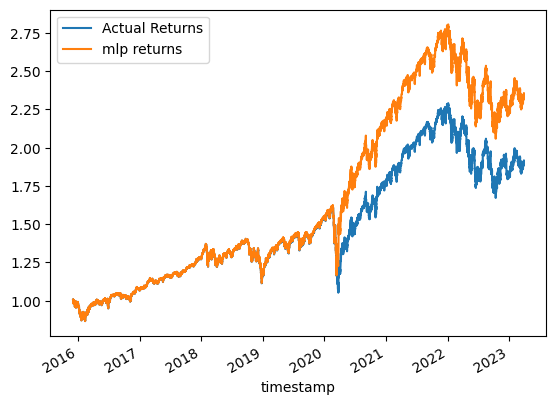

In [55]:

#[(momentum_returns['Actual Returns'] >= 0), 'Signal'] = 1


#training_begin =  pd.Timestamp("2022-01-01 12:00:00")
#training_end =  pd.Timestamp("2022-01-01 12:00:00") + DateOffset(years=1)



training_begin = X.index.min()
training_end = X.index.min() + DateOffset(years=9)

X_train = X.loc[training_begin:training_end]
y_train = y[training_begin:training_end]

X_test=X.loc[training_begin:]
y_test=y[training_begin:]
# Review the X_train DataFrame

#scaler = StandardScaler()
#X_scaler = scaler.fit(X_train)
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)


display(X_train.head())
display(X_train.tail())
display(historical_data)

#display(len(mlp_pred))
#display(mlp_pred)

from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='adam',hidden_layer_sizes=(25,4))

mlp_model=mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)
#display(mlp_pred)
historical_data_copy=historical_data.copy()
historical_data_copy = historical_data_copy.drop(index=historical_data_copy.index[:2])

historical_data_copy['mlp predictions'] = mlp_pred
#historical_data['strategy returns']=historical_data['Actual Returns']*historical_data['mlp predictions']
historical_data_copy['mlp returns']=historical_data_copy['mlp predictions']*historical_data_copy['Actual Returns']


(1+historical_data_copy[['Actual Returns','mlp returns']]).cumprod().plot()


In [56]:
#Saving model to a .pkl file
import joblib
joblib.dump(mlp_model, 's&p_mlp_model.pkl')


['s&p_mlp_model.pkl']

In [ ]:
apple_data

In [48]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler

apple_data['Apple Actual Returns']=apple_data["close"].pct_change().dropna()
#momentum_returns["close"]
apple_data['momentum predicted']=np.where(apple_data['Apple Actual Returns']>0,1,0)
apple_data['momentum entry/exit']=apple_data['momentum predicted'].diff()
apple_data=apple_data.dropna()


X=apple_data[['vwap','ema-8','rsi']].shift().dropna()
y=apple_data['momentum predicted']
X=X.drop(X.index[0])
#X.index.min()


/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/100080382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['Apple Actual Returns']=apple_data["close"].pct_change().dropna()
/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/100080382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple_data['momentum predicted']=np.where(apple_data['Apple Actual Returns']>0,1,0)
/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/100080382.py:7: SettingWithCopyW

/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/1686495161.py:10: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  X_train = X.loc[training_begin:training_end]
/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/1686495161.py:11: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  y_train = y[training_begin:training_end]
/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/1686495161.py:13: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  X_test=X.loc[training_end:]
/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/1686495161.py:14: Fu

,vwap,ema-8,rsi
timestamp,,,
2021-01-04 09:00:00+00:00,132.717477,132.731614,43.329064
2021-01-04 10:00:00+00:00,133.697210,132.924589,40.580818
2021-01-04 11:00:00+00:00,134.028874,133.230236,46.917386
2021-01-04 12:00:00+00:00,134.167796,133.399072,49.364211
2021-01-04 13:00:00+00:00,133.795372,133.521501,47.260858


,vwap,ema-8,rsi
timestamp,,,
2021-12-31 20:00:00+00:00,177.547852,177.798441,47.430190
2021-12-31 21:00:00+00:00,177.706695,177.756566,42.756681
2021-12-31 22:00:00+00:00,177.570165,177.699551,37.638832
2021-12-31 23:00:00+00:00,177.569120,177.666317,39.057751
2022-01-01 00:00:00+00:00,177.611063,177.651580,41.097999


,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit,Actual Returns,momentum predicted,momentum entry/exit,Apple Actual Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-12-01 11:00:00+00:00,118.710,118.9900,118.71,118.9000,14956,72,118.858641,0.1800,0,0.0,...,1,0.0,1,0.0,1,0.0,0.001516,1,1.0,0.001516
2015-12-01 12:00:00+00:00,118.880,118.9800,118.76,118.9400,24677,129,118.857629,0.0400,0,0.0,...,1,0.0,1,0.0,1,0.0,0.000336,1,0.0,0.000336
2015-12-01 13:00:00+00:00,118.880,119.0000,118.60,118.6300,95036,309,118.732677,-0.3100,1,1.0,...,0,-1.0,0,-1.0,0,-1.0,-0.002606,0,-1.0,-0.002606
2015-12-01 14:00:00+00:00,118.630,118.8500,118.15,118.6500,4101576,22421,118.479071,0.0200,0,-1.0,...,0,0.0,0,0.0,0,0.0,0.000169,1,1.0,0.000169
2015-12-01 15:00:00+00:00,118.640,118.7400,117.82,118.2800,5896379,32952,118.283565,-0.3700,1,1.0,...,0,0.0,0,0.0,0,0.0,-0.003118,0,-1.0,-0.003118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 14:00:00+00:00,159.860,160.3000,159.35,159.5106,7403279,103605,159.884592,-0.3374,1,1.0,...,1,0.0,1,0.0,1,0.0,-0.002111,0,-1.0,-0.002111
2023-03-29 15:00:00+00:00,159.510,160.0600,159.50,159.8700,4514177,43984,159.808287,0.3594,0,-1.0,...,1,0.0,1,0.0,1,0.0,0.002253,1,1.0,0.002253
2023-03-29 16:00:00+00:00,159.880,160.0400,159.51,159.9550,3915971,39238,159.882016,0.0850,0,0.0,...,1,0.0,1,0.0,1,0.0,0.000532,1,0.0,0.000532


,vwap,ema-8,rsi
timestamp,,,
2022-01-03 09:00:00+00:00,177.669282,177.662340,37.233461
2022-01-03 10:00:00+00:00,177.954244,177.755153,33.947224
2022-01-03 11:00:00+00:00,178.121076,177.847342,39.744233
2022-01-03 12:00:00+00:00,178.337821,177.981266,38.035070
2022-01-03 13:00:00+00:00,178.272343,178.040984,38.823829
...,...,...,...
2023-03-29 14:00:00+00:00,159.779538,158.696973,71.248758
2023-03-29 15:00:00+00:00,159.884592,158.877779,73.551100
2023-03-29 16:00:00+00:00,159.808287,159.098273,74.140282


5321

array([1, 1, 1, ..., 1, 1, 1])

/var/folders/49/gpk50n7s6nj72g6n3hktw_tm0000gn/T/ipykernel_22996/1686495161.py:38: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  apple_data_copy=apple_data.loc[training_end:].copy()


5321

,open,high,low,close,volume,trade_count,vwap,delta,Predicted-vwap,vwap-entry/exit,...,Predicted ema-5,ema-5-entry/exit,Predicted ema-8,ema-8-entry/exit,Predicted ema-13,ema-13-entry/exit,Actual Returns,momentum predicted,momentum entry/exit,Apple Actual Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-03 09:00:00+00:00,178.260,178.3400,177.76,178.0800,60937,1727,177.954244,0.3800,0,0.0,...,1,0.0,1,0.0,1,1.0,0.002138,1,0.0,0.002138
2022-01-03 10:00:00+00:00,178.080,178.2200,177.99,178.1700,45629,887,178.121076,0.0900,0,0.0,...,1,0.0,1,0.0,1,0.0,0.000505,1,0.0,0.000505
2022-01-03 11:00:00+00:00,178.170,178.4600,178.16,178.4500,39121,1189,178.337821,0.2800,0,0.0,...,1,0.0,1,0.0,1,0.0,0.001572,1,0.0,0.001572
2022-01-03 12:00:00+00:00,178.460,178.5000,178.09,178.2500,184199,2743,178.272343,-0.2000,1,1.0,...,1,0.0,1,0.0,1,0.0,-0.001121,0,-1.0,-0.001121
2022-01-03 13:00:00+00:00,178.250,178.4500,177.57,177.6500,359954,5117,178.086768,-0.6000,1,0.0,...,0,-1.0,0,-1.0,0,-1.0,-0.003366,0,0.0,-0.003366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29 14:00:00+00:00,159.860,160.3000,159.35,159.5106,7403279,103605,159.884592,-0.3374,1,1.0,...,1,0.0,1,0.0,1,0.0,-0.002111,0,-1.0,-0.002111
2023-03-29 15:00:00+00:00,159.510,160.0600,159.50,159.8700,4514177,43984,159.808287,0.3594,0,-1.0,...,1,0.0,1,0.0,1,0.0,0.002253,1,1.0,0.002253
2023-03-29 16:00:00+00:00,159.880,160.0400,159.51,159.9550,3915971,39238,159.882016,0.0850,0,0.0,...,1,0.0,1,0.0,1,0.0,0.000532,1,0.0,0.000532


<AxesSubplot: xlabel='timestamp'>

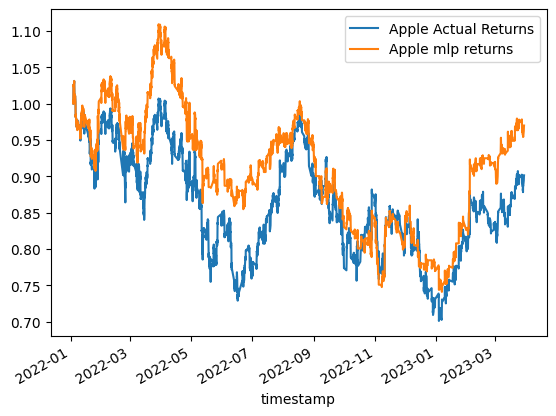

In [56]:

#[(momentum_returns['Actual Returns'] >= 0), 'Signal'] = 1


import matplotlib.pyplot as plt


training_begin =  pd.Timestamp("2021-01-01 12:00:00")
training_end =  pd.Timestamp("2021-01-01 12:00:00") + DateOffset(years=1)

X_train = X.loc[training_begin:training_end]
y_train = y[training_begin:training_end]

X_test=X.loc[training_end:]
y_test=y[training_end:]
# Review the X_train DataFrame

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


display(X_train.head())
display(X_train.tail())
display(apple_data)

display(X_test)
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,15), random_state=1)
mlp_model=mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)
display(len(mlp_pred))
display(mlp_pred)

#display(mlp_pred) afsdlkj 

apple_data_copy=apple_data.loc[training_end:].copy()
display(len(apple_data_copy))
display(apple_data_copy)

#apple_data_copy = apple_data_copy.drop(index=apple_data_copy.index[:2])

apple_data_copy['mlp predictions'] = mlp_pred
#historical_data['strategy returns']=historical_data['Actual Returns']*historical_data['mlp predictions']
apple_data_copy[ 'Apple mlp returns']=apple_data_copy['mlp predictions']*apple_data_copy['Apple Actual Returns']
#plt.title('Medium Risk--Apple')
#plt.show()


Apple_performance=(1+apple_data_copy[['Apple Actual Returns','Apple mlp returns']]).cumprod().plot()

Apple_performance


In [51]:
Apple_performance.figure.savefig('Apple mlp vs actual returns.png')

In [57]:
#Saving model to a .pkl file
import joblib
joblib.dump(mlp_model, 'apple_mlp_model.pkl')


['apple_mlp_model.pkl']

In [ ]:
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler

east_data['Actual Returns']=east_data["close"].pct_change().dropna()
#momentum_returns["close"]
east_data['momentum predicted']=np.where(east_data['Actual Returns']>0,1,0)
east_data['momentum entry/exit']=east_data['momentum predicted'].diff()
east_data=east_data.dropna()

In [ ]:

#[(momentum_returns['Actual Returns'] >= 0), 'Signal'] = 1


X=east_data[['vwap','ema-8','rsi']].shift().dropna()
y=east_data['momentum predicted']
X=X.drop(X.index[0])



training_begin = X.index.min()
training_end = X.index.min() + DateOffset(years=9)

X_train = X.loc[training_begin:training_end]
y_train = y[training_begin:training_end]

X_test=X.loc[training_begin:]
y_test=y[training_begin:]
# Review the X_train DataFrame

scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


display(X_train.head())
display(X_train.tail())
display(apple_data)

In [ ]:
y_train

In [ ]:
display(len(X_train))
display(len(y_train))

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(15,), random_state=1)
mlp_model=mlp_clf.fit(X_train,y_train)
mlp_pred=mlp_model.predict(X_test)
display(mlp_pred)


In [ ]:
display(len(y_train))
display(y_train)
display(len(X_train))

In [ ]:
display(len(mlp_pred))
display(mlp_pred)
historical_data_copy=historical_data.copy()
historical_data_copy = historical_data_copy.drop(index=historical_data_copy.index[:2])

display(len(historical_data_copy['Actual Returns']))

In [ ]:
historical_data_copy['mlp predictions'] = mlp_pred
#historical_data['strategy returns']=historical_data['Actual Returns']*historical_data['mlp predictions']
historical_data_copy['mlp returns']=historical_data_copy['mlp predictions']*historical_data_copy['Actual Returns']


In [ ]:
plot=(1+historical_data_copy[['Actual Returns','mlp returns']]).cumprod().plot()
